<a href="https://colab.research.google.com/github/sakshibasapure/colab/blob/master/CIFAAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
!pip install torch

Import and Test for CUDA

In [145]:
import torch
import numpy as np

#check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
  print("CUDA is not available. Training on CPU ...")
else:
  print("CUDA is available. Training on GPU ...")
  print('Torch', torch.__version__, 'CUDA', torch.version.cuda)


CUDA is available. Training on GPU ...
Torch 1.7.0+cu101 CUDA 10.1


Importing Libraries


In [146]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset

In [147]:

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler



#Covert data to a normalized torch.FloatTensor
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

'''
[
      'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
      'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
      'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
      'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
      'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
      'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
      'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
      'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
      'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
      'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
      'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
      'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
      'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
      'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
      'worm'
    ]
'''


Files already downloaded and verified
Files already downloaded and verified


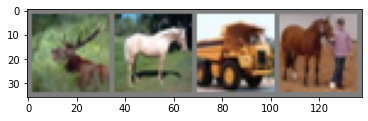

In [148]:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
#print(' '.join('%5s' % classes[labels[j]] for j in range(4))) 




Loading Dataset using Keras


In [149]:
'''
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(x_train, t_train), (x_test, t_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show() '''

"\n# example of loading the cifar10 dataset\nfrom matplotlib import pyplot\nfrom keras.datasets import cifar10\n# load dataset\n(x_train, t_train), (x_test, t_test) = cifar10.load_data()\n# summarize loaded dataset\nprint('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))\nprint('Test: X=%s, y=%s' % (testX.shape, testy.shape))\n# plot first few images\nfor i in range(9):\n\t# define subplot\n\tpyplot.subplot(330 + 1 + i)\n\t# plot raw pixel data\n\tpyplot.imshow(trainX[i])\n# show the figure\npyplot.show() "

Normalization

We know that the pixel values for each image in the dataset are unsigned integers in the range between no color and full color, or 0 and 255.

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

A good starting point is to normalize the pixel values, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [150]:
'''
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm'''

"\n# scale pixels\ndef prep_pixels(train, test):\n\t# convert from integers to floats\n\ttrain_norm = train.astype('float32')\n\ttest_norm = test.astype('float32')\n\t# normalize to range 0-1\n\ttrain_norm = train_norm / 255.0\n\ttest_norm = test_norm / 255.0\n\t# return normalized images\n\treturn train_norm, test_norm"

Define Model

In [151]:
'''# switch to False to use CPU
use_cuda = True

use_cuda = use_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu");
torch.manual_seed(1);'''

'# switch to False to use CPU\nuse_cuda = True\n\nuse_cuda = use_cuda and torch.cuda.is_available()\ndevice = torch.device("cuda" if use_cuda else "cpu");\ntorch.manual_seed(1);'

In [152]:

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Loss Function

In [153]:
import torch.optim as optim

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Training and Testing Fucntions


In [154]:
def train(model,device, trainloader, optimizer, epoch):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    
      


In [155]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [156]:
def test(model,device, testloader):
  dataiter = iter(testloader)
  images, labels = dataiter.next()

  # print images
  imshow(torchvision.utils.make_grid(images))
  print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

  net = Net()
  net.load_state_dict(torch.load(PATH))

  outputs = net(images)

  _, predicted = torch.max(outputs, 1)

  print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                for j in range(4)))
  


  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print()
  print('Accuracy of the network on the 10000 test images: %d %%' % (
      100 * correct / total))



EPOCH 1
Training Loss: 
[1,  2000] loss: 2.142
[1,  4000] loss: 1.789
[1,  6000] loss: 1.654
[1,  8000] loss: 1.579
[1, 10000] loss: 1.527
[1, 12000] loss: 1.479



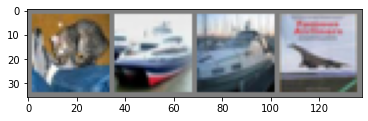

GroundTruth:    cat  ship  ship plane
Predicted:   frog   dog   dog   dog

Accuracy of the network on the 10000 test images: 9 %

EPOCH 2
Training Loss: 
[2,  2000] loss: 1.397
[2,  4000] loss: 1.389
[2,  6000] loss: 1.348
[2,  8000] loss: 1.307
[2, 10000] loss: 1.302
[2, 12000] loss: 1.303



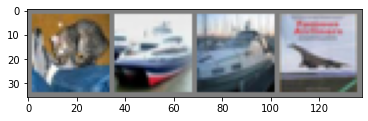

GroundTruth:    cat  ship  ship plane
Predicted:   frog   dog   dog   dog

Accuracy of the network on the 10000 test images: 9 %

EPOCH 3
Training Loss: 
[3,  2000] loss: 1.208
[3,  4000] loss: 1.216
[3,  6000] loss: 1.216
[3,  8000] loss: 1.208
[3, 10000] loss: 1.191
[3, 12000] loss: 1.171



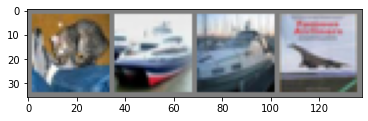

GroundTruth:    cat  ship  ship plane
Predicted:   frog   dog   dog   dog

Accuracy of the network on the 10000 test images: 9 %

EPOCH 4
Training Loss: 
[4,  2000] loss: 1.110
[4,  4000] loss: 1.125
[4,  6000] loss: 1.109
[4,  8000] loss: 1.119
[4, 10000] loss: 1.121
[4, 12000] loss: 1.126



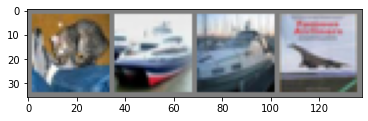

GroundTruth:    cat  ship  ship plane
Predicted:   frog   dog   dog   dog

Accuracy of the network on the 10000 test images: 9 %

EPOCH 5
Training Loss: 
[5,  2000] loss: 1.022
[5,  4000] loss: 1.034
[5,  6000] loss: 1.036
[5,  8000] loss: 1.070
[5, 10000] loss: 1.061
[5, 12000] loss: 1.059



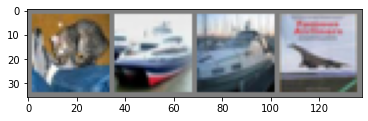

GroundTruth:    cat  ship  ship plane
Predicted:   frog   dog   dog   dog

Accuracy of the network on the 10000 test images: 9 %



In [157]:
for epoch in range(5):
  print("EPOCH", epoch + 1)
  print("Training Loss: ")
  train(model,device, trainloader, optimizer, epoch)
  print()
  test(model, device, testloader)
  print()